In [1]:
import os
import neptune
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the dataframes

In [2]:



file1 = '/Users/jonaheaton/Desktop/VAE April18 part1.csv'
file2 = '/Users/jonaheaton/Desktop/VAE April18 part2.csv'
file3 = '/Users/jonaheaton/Desktop/VAE April18 part3.csv'

df2 = pd.read_csv(file2, index_col=0)
df1 = pd.read_csv(file1, index_col=0)
df3 = pd.read_csv(file3, index_col=0)
df = df1.join(df2, how='outer', lsuffix='_1', rsuffix='_2')
df = df.join(df3, how='outer', rsuffix='_3')

In [3]:
# get the important tages
from collections import defaultdict
important_tags = ['april17_best90','april17_pareto','april15_leila','april18_top200','april18_best20']
runs_with_tags_dict= defaultdict(list)

for tag in important_tags:
    for run_id in df.index:
        tags_in_run = eval(df.loc[run_id]['Tags'])+eval(df.loc[run_id]['Tags_2'])+eval(df.loc[run_id]['Tags_1'])
        if tag in tags_in_run:
            runs_with_tags_dict[tag].append(run_id)

## Cleanup and Simplify the dataframe to the essential bits

In [4]:
pretrain_objectives = ['Reconstruction Loss (val)',' StudyID AUC (val)', 'CohortLabel AUC (val)','Gender AUC (val)','AgeGroup AUC (val)', 'Age MAE (val)']


finetune_objectives = ['MSKCC AUC (finetune, val)', 'MSKCC AUC (finetune, train)', 'MSKCC AUC (randinit, val)',\
                       'IMDC AUC (finetune, val)', 'IMDC AUC (finetune, train)', 'IMDC AUC (randinit, val)']

key_params = ['Latent dim', '# hidden layers','']#, 'Learning Rate', 'Num Epochs']


search_dct = {
    'Reconstruction Loss (val)': {
        'must_contain_all': ['recon','val'],
        'must_contain_one': [],
        'exact_matches': []
    },
    'StudyID AUC (val)': {
        'must_contain_all': ['StudyID','AUROC','val'],
        'must_contain_one': [],
        'exact_matches': []
    },
    'CohortLabel AUC (val)': {
        'must_contain_all': ['AUROC','val'],
        'must_contain_one': ['CohortLabel','Cohort Label'],
        'exact_matches': []
    },
    'Gender AUC (val)': {
        'must_contain_all': ['AUROC','val'],
        'must_contain_one': ['isFemale','Gender'],
        'exact_matches': []
    },
    'AgeGroup AUC (val)': {
        'must_contain_all': ['AUROC','val','isPediatric'],
        'must_contain_one': [],
        'exact_matches': []
    },
    'Age MAE (val)': {
        'must_contain_all': ['MAE','val'],
        'must_contain_one': ['Age'],
        'exact_matches': []
    },
    'MSKCC AUC (finetune, val)': {
        'must_contain_all': ['MSKCC','finetune','val'],
        'must_contain_one': ['AUROC','AUC'],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'MSKCC AUC (finetune, train)': {
        'must_contain_all': ['MSKCC','finetune','train'],
        'must_contain_one': ['AUROC','AUC'],
        'must_not_contain': ['variance','std'],
        'exact_matches': []
    },
    'MSKCC AUC (randinit, val)': {
        'must_contain_all': ['MSKCC','randinit','val'],
        'must_contain_one': ['AUROC','AUC'],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'IMDC AUC (finetune, val)': {
        'must_contain_all': ['IMDC','finetune','val'],
        'must_contain_one': ['AUROC','AUC'],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'IMDC AUC (finetune, train)': {
        'must_contain_all': ['IMDC','finetune','train'],
        'must_contain_one': ['AUROC','AUC'],
        'exact_matches': [],
        'must_not_contain': ['variance','std'],
    },
    'IMDC AUC (randinit, val)': {
        'must_contain_all': ['IMDC','randinit','val'],
        'must_contain_one': ['AUROC','AUC'],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'Latent dim': {
        'must_contain_all': ['latent'],
        'must_contain_one': [],
        'exact_matches': []
    },
    '# hidden layers': {
        'must_contain_all': ['layers'],
        'must_contain_one': [],
        'exact_matches': []
    },
    'encoder kind':{
        'must_contain_all': ['encoder','kind'],
        'must_contain_one': [],
        'exact_matches': []
    },
    'study name':{
        'must_contain_all': ['original_kwargs','study_info_dict','study_name'],
        'must_contain_one': [],
        'exact_matches': []
    },
    'Both OS C-Index (finetune, val)': {
        'must_contain_all': ['both-OS','finetune','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'Both OS C-Index (finetune, train)': {
        'must_contain_all': ['both-OS','finetune','train','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['variance','std'],
        'exact_matches': []
    },
    'Both OS C-Index (randinit, val)': {
        'must_contain_all': ['both-OS','randinit','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'Both PFS C-Index (finetune, val)': {
        'must_contain_all': ['both-PFS','finetune','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'Both PFS C-Index (finetune, train)': {
        'must_contain_all': ['both-PFS','finetune','train','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['variance','std'],
        'exact_matches': []
    },
    'Both PFS C-Index (randinit, val)': {
        'must_contain_all': ['both-PFS','randinit','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std'],
        'exact_matches': []
    },
    'NIVO OS C-Index (finetune, val)': {
        'must_contain_all': ['NIVO-OS','finetune','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','EVER','ever'],
        'exact_matches': []
    },
    'NIVO OS C-Index (finetune, train)': {
        'must_contain_all': ['NIVO-OS','finetune','train','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['variance','std','EVER','ever'],
        'exact_matches': []
    },
    'NIVO OS C-Index (randinit, val)': {
        'must_contain_all': ['NIVO-OS','randinit','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','EVER','ever'],
        'exact_matches': []
    },
    'multitask NIVO OS C-Index (finetune, val)': {
        'must_contain_all': ['NIVO-OS AND EVER-OS','finetune','val','Concordance','Cox_NIVO OS'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','hhl'],
        'exact_matches': []
    },
    'multitask NIVO OS C-Index (finetune, train)': {
        'must_contain_all': ['NIVO-OS AND EVER-OS','finetune','train','Concordance','Cox_NIVO OS'],
        'must_contain_one': [],
        'must_not_contain': ['variance','std','hhl'],
        'exact_matches': []
    },
    'multitask NIVO OS C-Index (randinit, val)': {
        'must_contain_all': ['NIVO-OS AND EVER-OS','randinit','val','Concordance','Cox_NIVO OS'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','hhl'],
        'exact_matches': []
    },
    'EVER OS C-Index (finetune, val)': {
        'must_contain_all': ['EVER-OS','finetune','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','NIVO','nivo'],
        'exact_matches': []
    },
    'EVER OS C-Index (finetune, train)': {
        'must_contain_all': ['EVER-OS','finetune','train','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['variance','std','NIVO','nivo'],
        'exact_matches': []
    },
    'EVER OS C-Index (randinit, val)': {
        'must_contain_all': ['EVER-OS','randinit','val','Concordance'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','NIVO','nivo'],
        'exact_matches': []
    },
    'multitask EVER OS C-Index (finetune, val)': {
        'must_contain_all': ['NIVO-OS AND EVER-OS','finetune','val','Concordance','Cox_EVER OS'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','hhl'],
        'exact_matches': []
    },
    'multitask EVER OS C-Index (finetune, train)': {
        'must_contain_all': ['NIVO-OS AND EVER-OS','finetune','train','Concordance','Cox_EVER OS'],
        'must_contain_one': [],
        'must_not_contain': ['variance','std','hhl'],
        'exact_matches': []
    },
    'multitask EVER OS C-Index (randinit, val)': {
        'must_contain_all': ['NIVO-OS AND EVER-OS','randinit','val','Concordance','Cox_EVER OS'],
        'must_contain_one': [],
        'must_not_contain': ['train','variance','std','hhl'],
        'exact_matches': []
    }


}




In [5]:
# find the matches to the search dictionary for each important objective/parameter

input_cols = df.columns
selected_cols = []

for obj in search_dct.keys():

    print(obj)
    for col in df.columns:
        
        # first check of the column is already selected for an objective
        if col in selected_cols:
            continue

        # then check for exact matches
        if col in search_dct[obj]['exact_matches']:
            # print(obj, col)
            selected_cols.append(col)

        # then check if the column contains all of the must_contain_all words
        elif len(search_dct[obj]['must_contain_all'])==0 or all([x.lower() in col.lower() for x in search_dct[obj]['must_contain_all']]):
            if len(search_dct[obj]['must_contain_one'])==0 or any([x.lower() in col.lower() for x in search_dct[obj]['must_contain_one']]):
                if len(search_dct[obj].get('must_not_contain', []))==0 or all([x.lower() not in col.lower() for x in search_dct[obj].get('must_not_contain', [])]):

                    # print(obj, col)
                    selected_cols.append(col)
            
                    search_dct[obj]['exact_matches'].append(col)
            

Reconstruction Loss (val)
StudyID AUC (val)
CohortLabel AUC (val)
Gender AUC (val)
AgeGroup AUC (val)
Age MAE (val)
MSKCC AUC (finetune, val)
MSKCC AUC (finetune, train)
MSKCC AUC (randinit, val)
IMDC AUC (finetune, val)
IMDC AUC (finetune, train)
IMDC AUC (randinit, val)
Latent dim
# hidden layers
encoder kind
study name
Both OS C-Index (finetune, val)
Both OS C-Index (finetune, train)
Both OS C-Index (randinit, val)
Both PFS C-Index (finetune, val)
Both PFS C-Index (finetune, train)
Both PFS C-Index (randinit, val)
NIVO OS C-Index (finetune, val)
NIVO OS C-Index (finetune, train)
NIVO OS C-Index (randinit, val)
multitask NIVO OS C-Index (finetune, val)
multitask NIVO OS C-Index (finetune, train)
multitask NIVO OS C-Index (randinit, val)
EVER OS C-Index (finetune, val)
EVER OS C-Index (finetune, train)
EVER OS C-Index (randinit, val)
multitask EVER OS C-Index (finetune, val)
multitask EVER OS C-Index (finetune, train)
multitask EVER OS C-Index (randinit, val)


In [6]:
# use the search_dct to create a new dataframe from the selected columns

df = df[selected_cols].copy()

for obj in search_dct.keys():
    if len(search_dct[obj]['exact_matches'])==0:
        print(obj, 'not found')
        continue

    if len(search_dct[obj]['exact_matches'])==1:
        # rename the column to the objective name
        df = df.rename(columns={search_dct[obj]['exact_matches'][0]: obj})
    
    else:
        print(obj, 'multiple matches', search_dct[obj]['exact_matches'])
        # merge the columns into a single column
        # if the columns are numeric then take the mean
        if all(df[search_dct[obj]['exact_matches']].dtypes != 'object'):
            df[obj] = df[search_dct[obj]['exact_matches']].mean(axis=1) # ignore nan
            
        else:
            # if the columns are not numeric then take the first one
            df[obj] = df[search_dct[obj]['exact_matches'][0]]
        df = df.drop(columns=search_dct[obj]['exact_matches'])
        


MSKCC AUC (finetune, val) multiple matches ['MSKCC_finetune/eval/val/Binary_MSKCC__AUROC (micro) (average)', 'MSKCC_finetune/eval/val2/Binary_MSKCC__AUROC (micro) (average)']
MSKCC AUC (finetune, train) multiple matches ['MSKCC_finetune/eval/train/Binary_MSKCC__AUROC (micro) (average)', 'MSKCC_finetune/eval/train2/Binary_MSKCC__AUROC (micro) (average)']
MSKCC AUC (randinit, val) multiple matches ['MSKCC_randinit/eval/val/Binary_MSKCC__AUROC (micro) (average)', 'MSKCC_randinit/eval/val2/Binary_MSKCC__AUROC (micro) (average)']
IMDC AUC (finetune, val) multiple matches ['IMDC_finetune/eval/val/Binary_IMDC__AUROC (micro) (average)', 'IMDC_finetune/eval/val2/Binary_IMDC__AUROC (micro) (average)']
IMDC AUC (finetune, train) multiple matches ['IMDC_finetune/eval/train/Binary_IMDC__AUROC (micro) (average)', 'IMDC_finetune/eval/train2/Binary_IMDC__AUROC (micro) (average)']
IMDC AUC (randinit, val) multiple matches ['IMDC_randinit/eval/val/Binary_IMDC__AUROC (micro) (average)', 'IMDC_randinit/ev

In [7]:
df

Reconstruction Loss (val)  StudyID AUC (val)  CohortLabel AUC (val)  \
Id                                                                              
RCC-3028                   0.603903           0.839010               0.935471   
RCC-3027                   0.948130           0.699162               0.670316   
RCC-3026                        NaN                NaN                    NaN   
RCC-3025                   0.535546           0.867888               0.887715   
RCC-3024                        NaN                NaN                    NaN   
...                             ...                ...                    ...   
RCC-1797                        NaN                NaN                    NaN   
RCC-1147                        NaN                NaN                    NaN   
RCC-1145                        NaN                NaN                    NaN   
RCC-1144                        NaN                NaN                    NaN   
RCC-1136                        NaN                NaN                    NaN   

          Gender AUC (val)  AgeGroup AUC (val)  Age MAE (val)  \
Id                                                              
RCC-3028          0.840494            0.985297      10.237596   
RCC-3027          0.507654            0.748492      10.312777   
RCC-3026               NaN                 NaN            NaN   
RCC-3025          0.655882            0.978086       9.438339   
RCC-3024               NaN                 NaN            NaN   
...                    ...                 ...            ...   
RCC-1797               NaN                 NaN            NaN   
RCC-1147               NaN                 NaN            NaN   
RCC-1145               NaN                 NaN            NaN   
RCC-1144               NaN                 NaN            NaN   
RCC-1136               NaN                 NaN            NaN   

               study name  Both OS C-Index (finetune, val)  \
Id                                                           
RCC-3028  Multi Obj Apr15                         0.687971   
RCC-3027  Multi Obj Apr15                         0.673678   
RCC-3026  Multi Obj Apr15                              NaN   
RCC-3025  Multi Obj Apr15                         0.601259   
RCC-3024  Multi Obj Apr15                              NaN   
...                   ...                              ...   
RCC-1797              NaN                              NaN   
RCC-1147              NaN                              NaN   
RCC-1145              NaN                              NaN   
RCC-1144              NaN                              NaN   
RCC-1136              NaN                              NaN   

          Both OS C-Index (randinit, val)  Both PFS C-Index (finetune, val)  \
Id                                                                            
RCC-3028                         0.687869                          0.600296   
RCC-3027                         0.538159                          0.530947   
RCC-3026                              NaN                               NaN   
RCC-3025                         0.500000                          0.491309   
RCC-3024                              NaN                               NaN   
...                                   ...                               ...   
RCC-1797                              NaN                               NaN   
RCC-1147                              NaN                               NaN   
RCC-1145                              NaN                               NaN   
RCC-1144                              NaN                               NaN   
RCC-1136                              NaN                          0.542292   

          ...  multitask EVER OS C-Index (randinit, val)  \
Id        ...                                              
RCC-3028  ...                                        NaN   
RCC-3027  ...                                        NaN   
RCC-3026  ...                      

In [8]:
df['model complexity'] = df['Latent dim']*df['# hidden layers']
df['MSKCC AUC Diff (finetune-randinit)'] = df['MSKCC AUC (finetune, val)'] - df['MSKCC AUC (randinit, val)']
df['IMDC AUC Diff (finetune-randinit)'] = df['IMDC AUC (finetune, val)'] - df['IMDC AUC (randinit, val)']
df['Both OS C-Index Diff (finetune-randinit)'] = df['Both OS C-Index (finetune, val)'] - df['Both OS C-Index (randinit, val)']
df['Both PFS C-Index Diff (finetune-randinit)'] = df['Both PFS C-Index (finetune, val)'] - df['Both PFS C-Index (randinit, val)']

In [9]:
# add the import tags
for tag in important_tags:
    df['Has Tag '+tag] = df.index.isin(runs_with_tags_dict[tag])

In [10]:
df.dropna(subset=['Gender AUC (val)','Age MAE (val)'], inplace=True)

# drop outliers in the Age MAE
df = df[df['Age MAE (val)']<100].copy()


## Now that it is clean we can do analysis

In [11]:
pretrain_objectives = ['Reconstruction Loss (val)','StudyID AUC (val)', 'CohortLabel AUC (val)','Gender AUC (val)','AgeGroup AUC (val)', 'Age MAE (val)']


finetune_objectives = ['MSKCC AUC (finetune, val)', 'MSKCC AUC (randinit, val)',\
                       'IMDC AUC (finetune, val)', 'IMDC AUC (randinit, val)',\
                        'Both OS C-Index (finetune, val)', 'Both OS C-Index (randinit, val)',
                        'Both PFS C-Index (finetune, val)', 'Both PFS C-Index (randinit, val)',
                        'NIVO OS C-Index (finetune, val)', 'NIVO OS C-Index (randinit, val)',
                        'EVER OS C-Index (finetune, val)', 'EVER OS C-Index (randinit, val)',
                        'multitask NIVO OS C-Index (finetune, val)', 'multitask NIVO OS C-Index (randinit, val)',
                        'multitask EVER OS C-Index (finetune, val)', 'multitask EVER OS C-Index (randinit, val)']

key_params = ['Latent dim', '# hidden layers','model complexity']#, 'Learning Rate', 'Num Epochs']

key_cols = pretrain_objectives+finetune_objectives+key_params

In [12]:
df['study name'].value_counts()

study name
Multi Obj Apr12      337
Multi Obj Apr15      149
Multi Obj Apr11v2    134
Multi Obj Apr10        2
Multi Obj Apr11        1
Name: count, dtype: int64

In [13]:
df['encoder kind'].value_counts()

encoder kind
VAE    623
Name: count, dtype: int64

In [14]:
ae_models = df[df['encoder kind']=='AE'].copy()
vae_models = df[df['encoder kind']=='VAE'].copy()


In [15]:
date_str = 'April18_5pm'
ae_models.sort_values('Age MAE (val)',ascending=True, inplace=True)
ae_models.sort_values('Gender AUC (val)', inplace=True, ascending=False)
ae_models.to_csv(f'/Users/jonaheaton/Desktop/ae_models {date_str}.csv')


vae_models.sort_values('Age MAE (val)',ascending=True, inplace=True)
vae_models.sort_values('Gender AUC (val)', inplace=True, ascending=False)
vae_models.to_csv(f'/Users/jonaheaton/Desktop/vae_models {date_str}.csv')

In [16]:
def update_directions_and_scales(df):

    df['neg log Reconstruction Loss (val)'] = -1* np.log(df['Reconstruction Loss (val)'])
    # remove the old column
    df = df.drop(columns=['Reconstruction Loss (val)'])

    df['neg Age MAE'] = -1*df['Age MAE (val)']
    df['neg Age MSE'] = -1*df['Age MAE (val)']
    df['neg StudyID AUC (val)'] = -1*df['StudyID AUC (val)']
    df.drop(columns=['Age MAE (val)','Age MAE (val)','StudyID AUC (val)'], inplace=True)


    df.drop(columns=['MSKCC AUC (finetune, train)', 'IMDC AUC (finetune, train)','neg Age MSE'], inplace=True)
    # drop the columns about tags
    df.drop(columns=[col for col in df.columns if 'Has Tag' in col], inplace=True)
    # drop any non-numeric columns
    df = df.select_dtypes(include=[np.number]).copy()

    

    return df

In [17]:
# ae_model_clean = update_directions_and_scales(ae_models.copy())


In [18]:
# Compute the correlation matrix

# corr_matrix = ae_model_clean.corr(method='spearman')

# # Plot the correlation matrix
# # make the plot bigger
# plt.figure(figsize=(20, 16))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Spearman Correlation Matrix (AE Model)')

# # rotate the x-axis labels
# plt.xticks(rotation=45, ha='right')

# plt.savefig('/Users/jonaheaton/Desktop/ae_correlation_matrix.png')

In [19]:
# sns.set_context('notebook')
# nonan_corr_matrix = corr_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')
# nonan_corr_matrix = nonan_corr_matrix.dropna(axis=0).dropna(axis=1).round(2)

# plt.figure(figsize=(26, 24))
# cax = sns.clustermap(nonan_corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 7})
# plt.xticks(rotation=45, ha='right')

# # Set colorbar label size
# cax.cax.yaxis.set_tick_params(labelsize=8)

# # Set colorbar label size
# cax.cax.yaxis.set_tick_params(labelsize=8)

# # Set axis label size
# cax.ax_heatmap.tick_params(axis='both', which='both', labelsize=8)

# # add a title to the clustergird
# cax.ax_col_dendrogram.set_title('Spearman Correlation Matrix (AE Model)')

# plt.savefig('/Users/jonaheaton/Desktop/ae_clustered_correlation_matrix.png')

In [20]:
vae_model_clean = update_directions_and_scales(vae_models.copy())

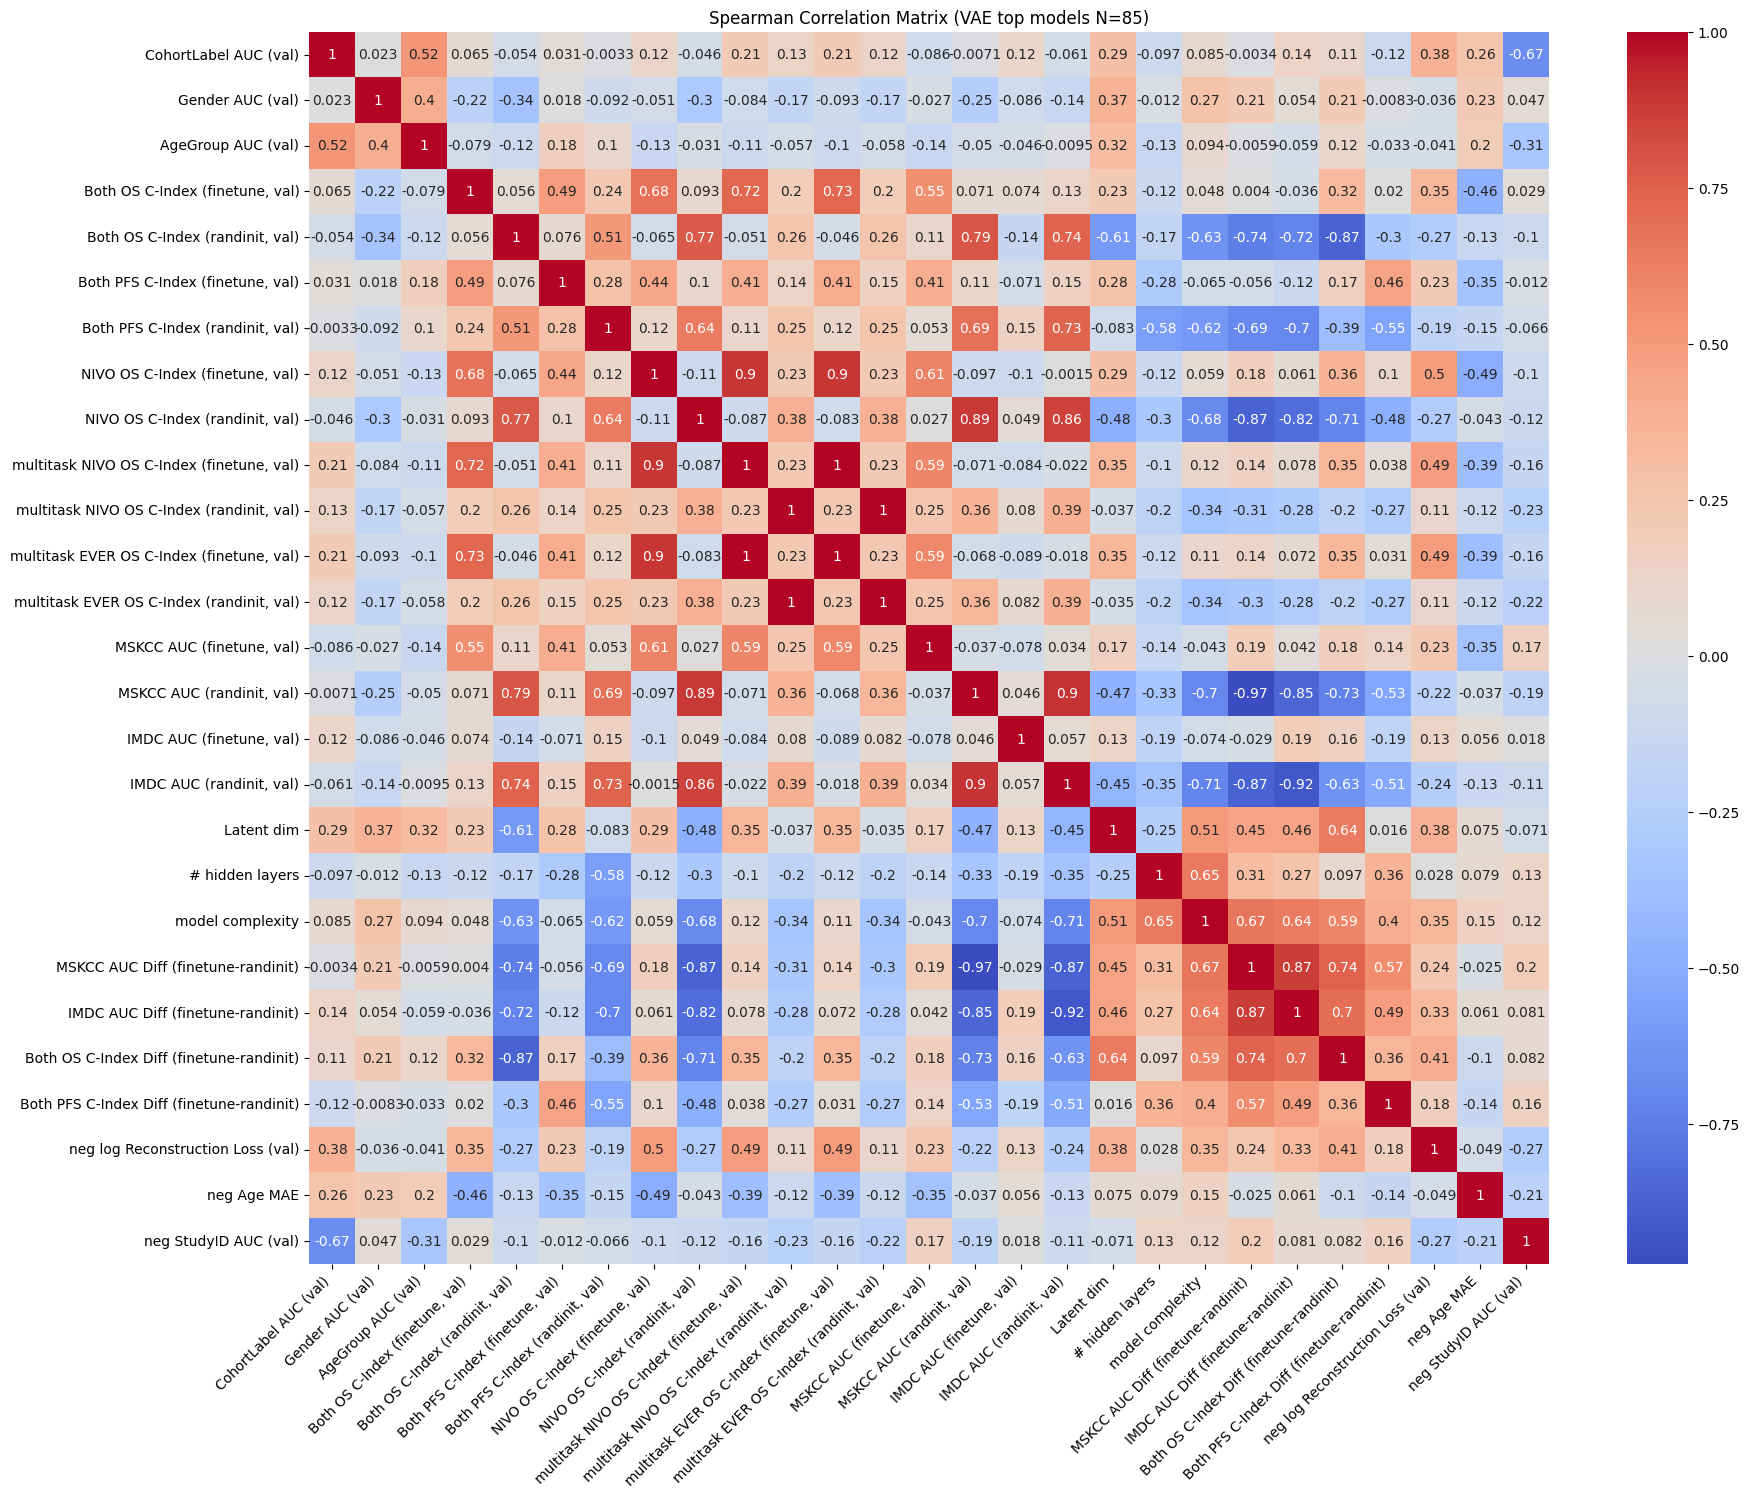

In [144]:
# Compute the correlation matrix
top_model_clean = vae_model_clean.loc[vae_models[vae_models['Has Tag april17_best90']].index].copy()
corr_matrix = top_model_clean.corr(method='spearman')
num_models = top_model_clean.shape[0]
# Plot the correlation matrix
# make the plot bigger
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Spearman Correlation Matrix (VAE top models N={num_models})')

# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.savefig(f'/Users/jonaheaton/Desktop/top90_vae_correlation_matrix {date_str}.png')

<Figure size 3000x2700 with 0 Axes>

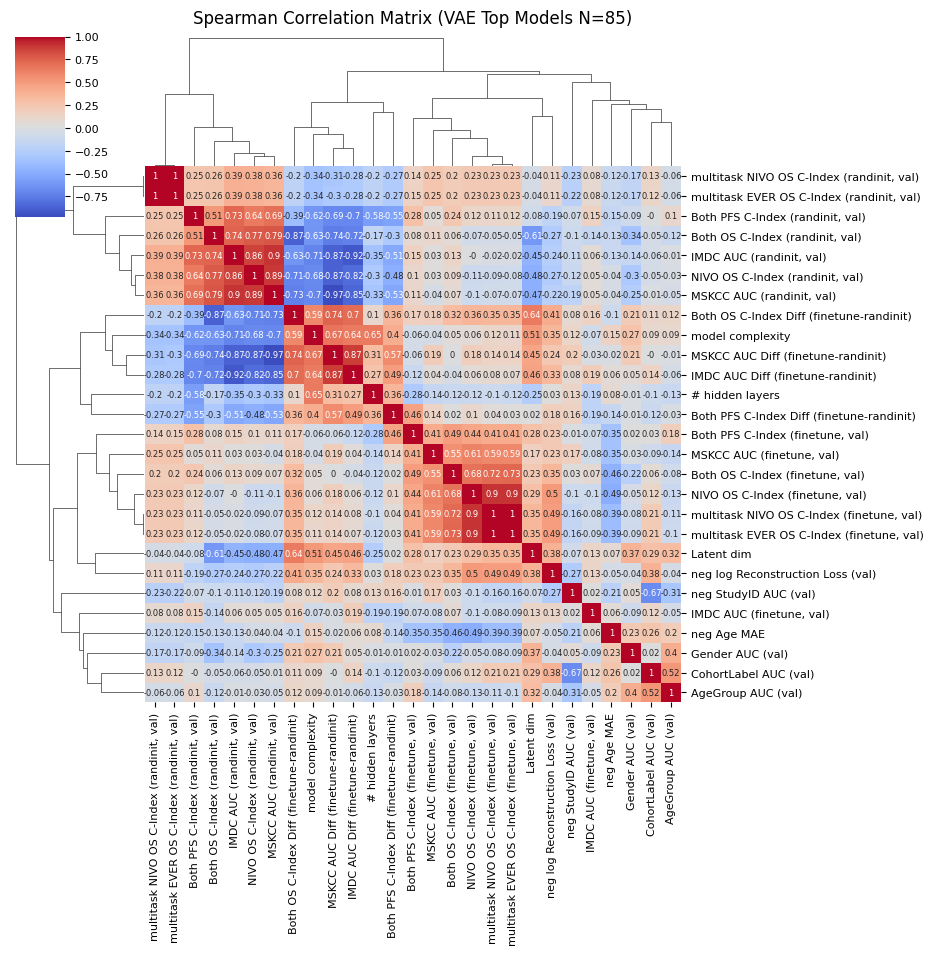

In [145]:
# sns.set_context('notebook')
nonan_corr_matrix = corr_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')
nonan_corr_matrix = nonan_corr_matrix.dropna(axis=0).dropna(axis=1).round(2)

plt.figure(figsize=(30, 27))
cax = sns.clustermap(nonan_corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 6})

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set axis label size
cax.ax_heatmap.tick_params(axis='both', which='both', labelsize=8)
# cax.ax_heatmap.tick_params(axis='x', rotation=45)
# cax.ax_heatmap.tick_params(axis='x', labelrotation=45)


# add a title to the clustergird
cax.ax_col_dendrogram.set_title(f'Spearman Correlation Matrix (VAE Top Models N={num_models})')

plt.savefig(f'/Users/jonaheaton/Desktop/top90_vae_clustered_correlation_matrix {date_str}.png')

In [146]:
vae_models['Has Tag april18_top200'].sum()

201

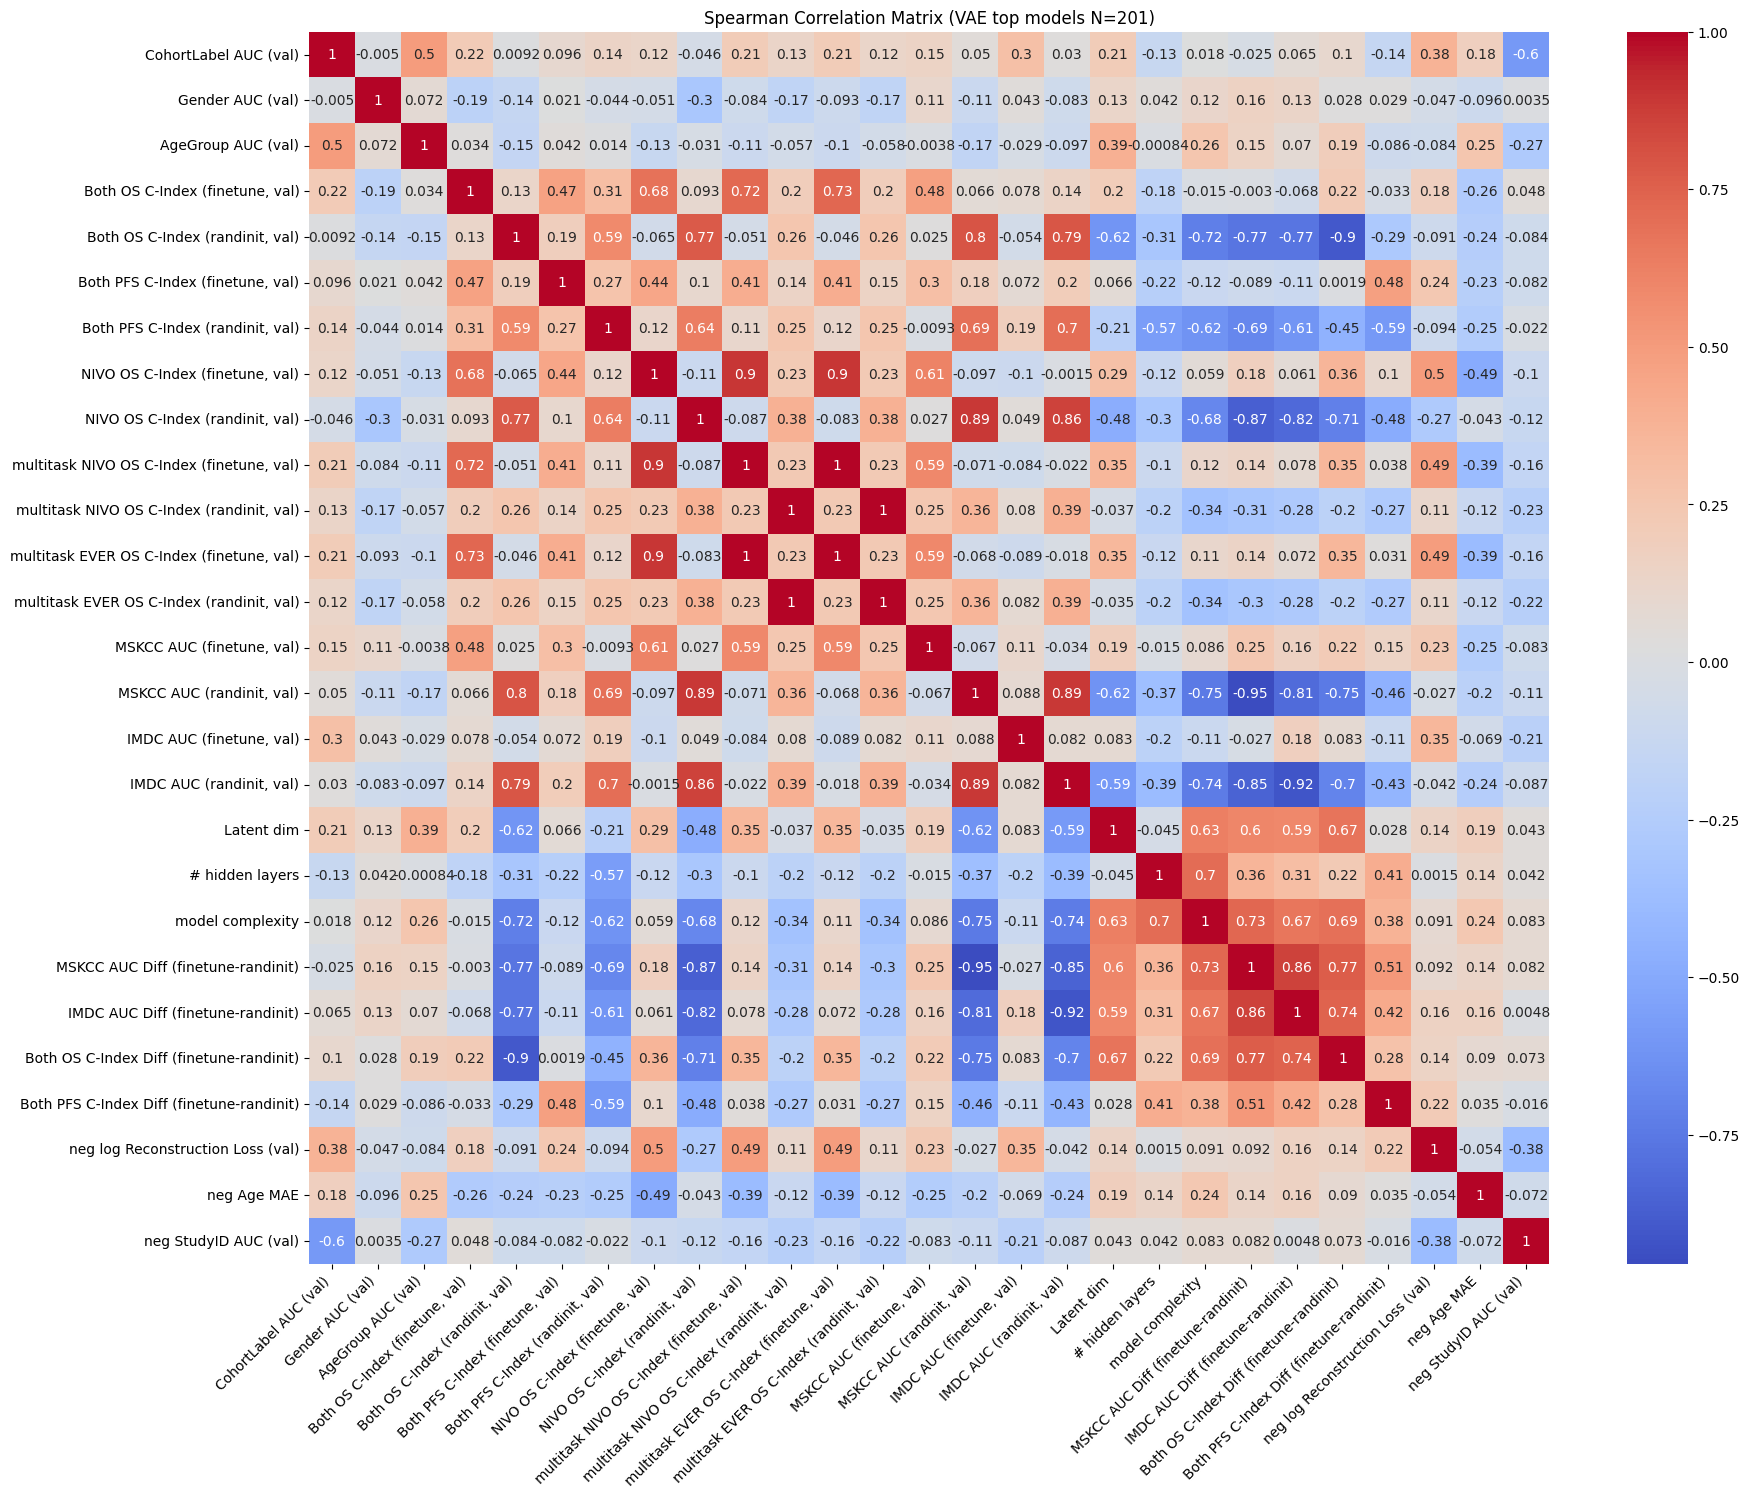

In [147]:
# Compute the correlation matrix
top_model_clean = vae_model_clean.loc[vae_models[vae_models['Has Tag april18_top200']].index].copy()
corr_matrix = top_model_clean.corr(method='spearman')
num_models = top_model_clean.shape[0]
# Plot the correlation matrix
# make the plot bigger
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Spearman Correlation Matrix (VAE top models N={num_models})')

# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.savefig(f'/Users/jonaheaton/Desktop/top200_vae_correlation_matrix {date_str}.png')

<Figure size 3000x2700 with 0 Axes>

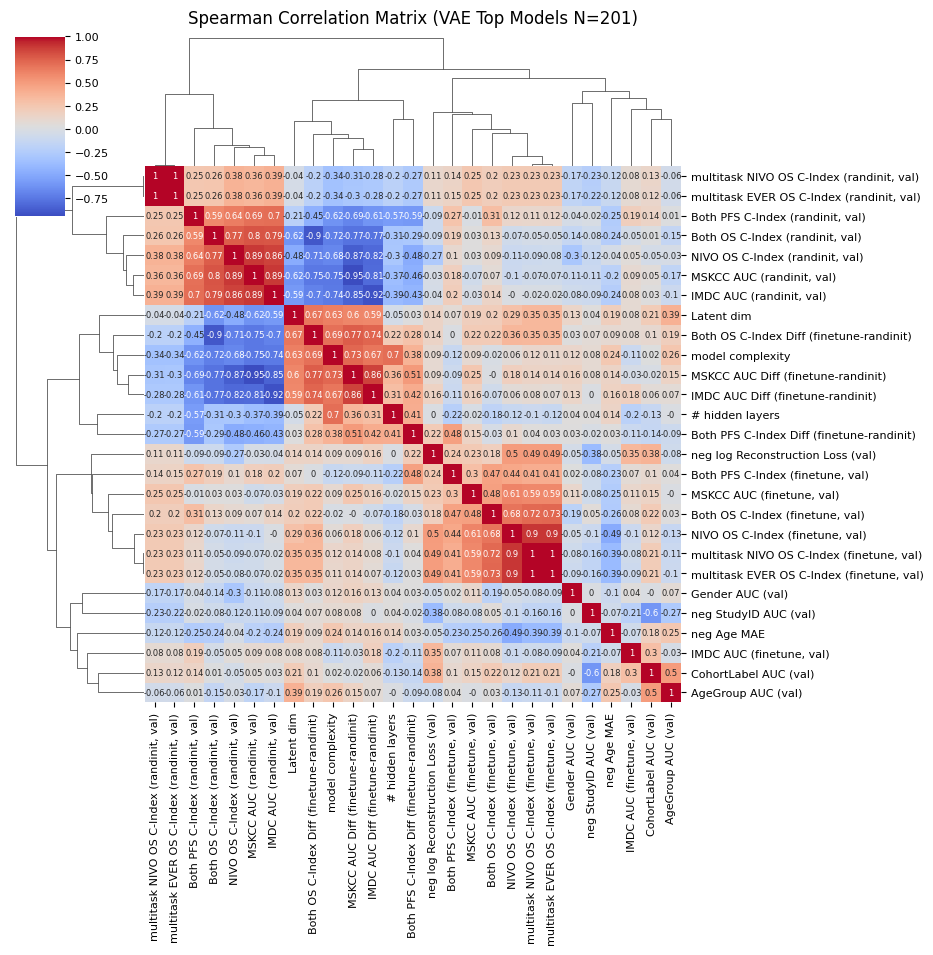

In [148]:
# sns.set_context('notebook')
nonan_corr_matrix = corr_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')
nonan_corr_matrix = nonan_corr_matrix.dropna(axis=0).dropna(axis=1).round(2)

plt.figure(figsize=(30, 27))
cax = sns.clustermap(nonan_corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 6})

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set axis label size
cax.ax_heatmap.tick_params(axis='both', which='both', labelsize=8)
# cax.ax_heatmap.tick_params(axis='x', rotation=45)
# cax.ax_heatmap.tick_params(axis='x', labelrotation=45)


# add a title to the clustergird
cax.ax_col_dendrogram.set_title(f'Spearman Correlation Matrix (VAE Top Models N={num_models})')

plt.savefig(f'/Users/jonaheaton/Desktop/top200_vae_clustered_correlation_matrix {date_str}.png')

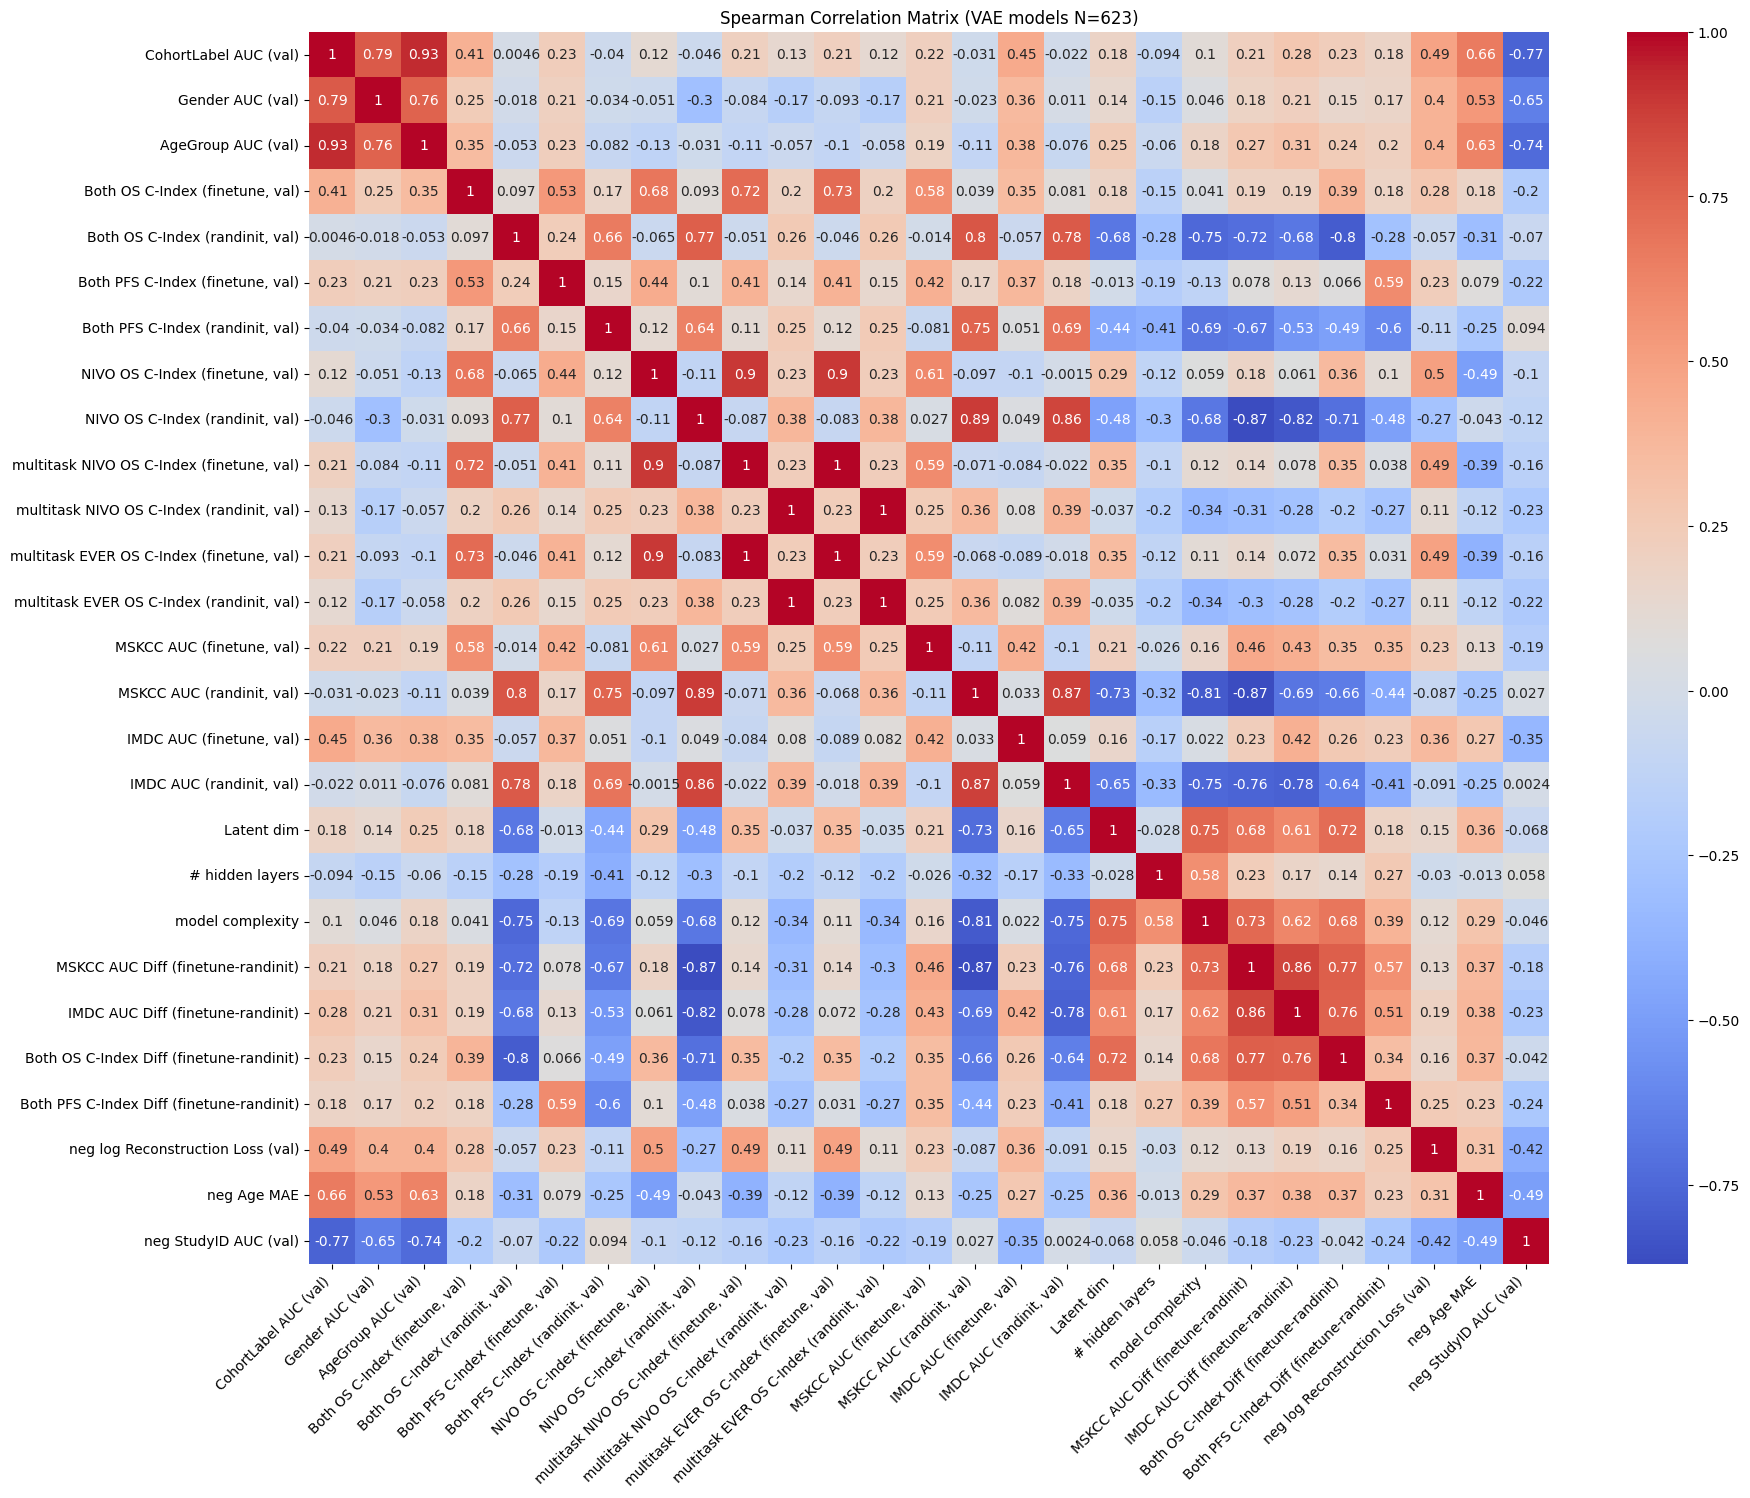

In [151]:
# Compute the correlation matrix

corr_matrix = vae_model_clean.corr(method='spearman')
num_models = vae_model_clean.shape[0]
# Plot the correlation matrix
# make the plot bigger
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Spearman Correlation Matrix (VAE models N={num_models})')

# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.savefig(f'/Users/jonaheaton/Desktop/vae_correlation_matrix {date_str}.png')

<Figure size 3000x2700 with 0 Axes>

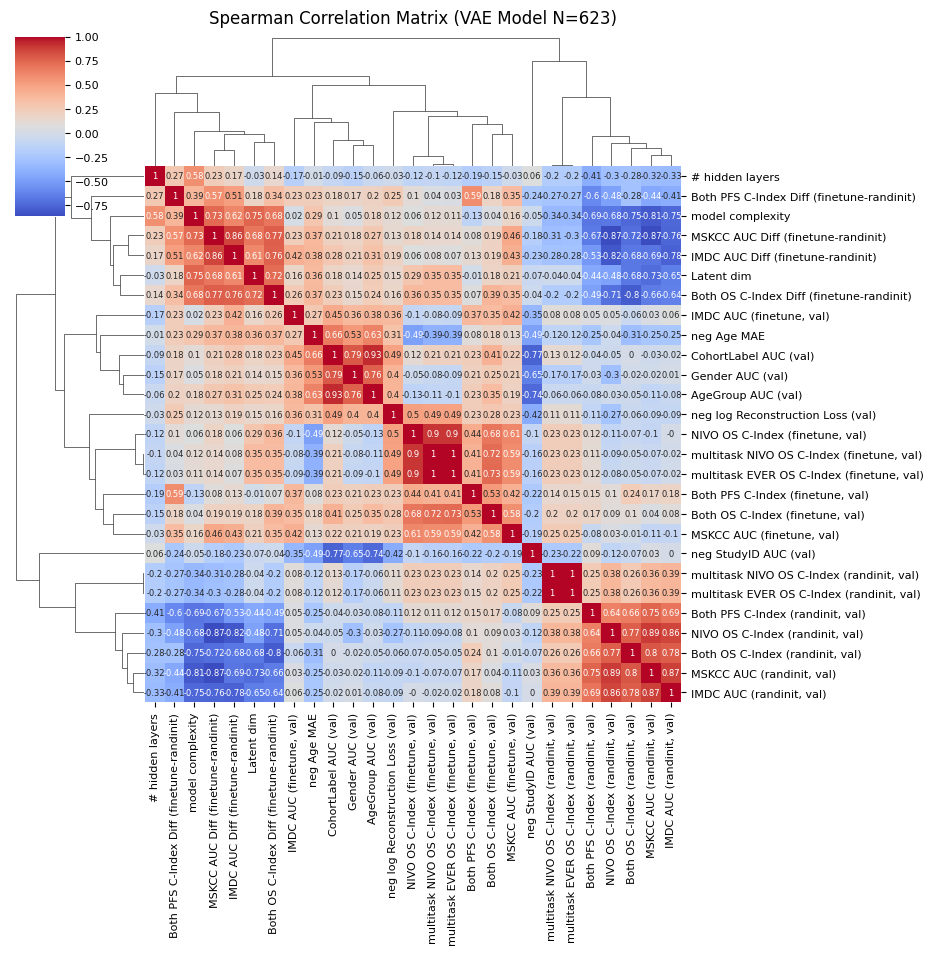

In [152]:
# sns.set_context('notebook')
nonan_corr_matrix = corr_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')
nonan_corr_matrix = nonan_corr_matrix.dropna(axis=0).dropna(axis=1).round(2)

plt.figure(figsize=(30, 27))
cax = sns.clustermap(nonan_corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 6})

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set axis label size
cax.ax_heatmap.tick_params(axis='both', which='both', labelsize=8)
# cax.ax_heatmap.tick_params(axis='x', rotation=45)
# cax.ax_heatmap.tick_params(axis='x', labelrotation=45)


# add a title to the clustergird
cax.ax_col_dendrogram.set_title(f'Spearman Correlation Matrix (VAE Model N={num_models})')

plt.savefig(f'/Users/jonaheaton/Desktop/vae_clustered_correlation_matrix {date_str}.png')

## Choose the best runs using the pareto front

In [153]:
from paretoset import paretoset

In [154]:
def pareto_reduction(df, sense_list=None, current_set=None, desired_num=None, objective_cols=None):
    
    if desired_num is None:
        desired_num = np.floor(0.2*df.shape[0])
    if objective_cols is None:
        objective_cols = df.columns
    if sense_list is None:
        sense_list = ['max' for _ in objective_cols]

    if df.shape[0] < desired_num*1.5:
        return df

    mask = paretoset(df[objective_cols], sense=sense_list)
    current_set = pd.concat([current_set, df[mask]])
    if current_set.shape[0] < desired_num:
        return pareto_reduction(df[~mask], sense_list, current_set, desired_num, objective_cols)
    else:
        return current_set
    

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1

    df_out = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    
    return df_out    

In [155]:
vae_model_clean.shape

(623, 27)

In [156]:
(~vae_model_clean['MSKCC AUC (finetune, val)'].isna()).sum()


565

In [157]:
vae_model_clean

CohortLabel AUC (val)  Gender AUC (val)  AgeGroup AUC (val)  \
Id                                                                      
RCC-3013               0.990883          0.890305            0.998471   
RCC-2559               0.827350          0.889301            0.965923   
RCC-2987               0.989760          0.887873            0.995976   
RCC-2507               0.979680          0.886695            0.995847   
RCC-2549               0.823431          0.886217            0.970000   
...                         ...               ...                 ...   
RCC-2731               0.446569          0.471697            0.502566   
RCC-2828               0.530451          0.468668            0.382603   
RCC-2657               0.700982          0.465275            0.794672   
RCC-2800               0.525452          0.463991            0.497216   
RCC-2253               0.752743          0.433537            0.942881   

          Both OS C-Index (finetune, val)  Both OS C-Index (randinit, val)  \
Id                                                                           
RCC-3013                         0.687362                         0.520318   
RCC-2559                              NaN                              NaN   
RCC-2987                         0.674226                         0.500000   
RCC-2507                              NaN                              NaN   
RCC-2549                              NaN                              NaN   
...                                   ...                              ...   
RCC-2731                              NaN                              NaN   
RCC-2828                         0.500000                         0.634237   
RCC-2657                              NaN                              NaN   
RCC-2800                         0.612696                         0.625016   
RCC-2253                              NaN                              NaN   

          Both PFS C-Index (finetune, val)  Both PFS C-Index (randinit, val)  \
Id                                                                             
RCC-3013                          0.545353                               0.5   
RCC-2559                          0.560457                               0.5   
RCC-2987                          0.553891                               0.5   
RCC-2507                          0.531973                               0.5   
RCC-2549                          0.539786                               0.5   
...                                    ...                               ...   
RCC-2731                          0.500000                               0.5   
RCC-2828                          0.500000                               0.5   
RCC-2657                          0.556925                               0.5   
RCC-2800                          0.500000                               0.5   
RCC-2253                          0.580651                               0.5   

          NIVO OS C-Index (finetune, val)  NIVO OS C-Index (randinit, val)  \
Id                                                                           
RCC-3013                              NaN                              NaN   
RCC-2559                              NaN                              NaN   
RCC-2987                         0.653792                              0.5   
RCC-2507                              NaN                              NaN   
RCC-2549                              NaN                              NaN   
...                                   ...                              ...   
RCC-2731                              NaN                              NaN   
RCC-2828                              NaN                              NaN   
RCC-2657                              NaN                              NaN   
RCC-2800                              NaN                              NaN   
RCC-2253                              NaN                           

In [158]:
# pretrain_clean_objectives = ['Gender AUC (val)','AgeGroup AUC (val)','CohortLabel AUC (val)','neg Age MAE','neg StudyID AUC (val)','neg log Reconstruction Loss (val)']

pretrain_clean_objectives = ['Gender AUC (val)','AgeGroup AUC (val)','CohortLabel AUC (val)','neg Age MAE','neg log Reconstruction Loss (val)']
df_obj = vae_model_clean[pretrain_clean_objectives].copy()

In [159]:
df_obj.to_csv('/Users/jonaheaton/Desktop/vae_pretrain_objectives.csv')

In [160]:
df_obj = remove_outliers(df_obj,'neg Age MAE')
df_obj = remove_outliers(df_obj,'neg log Reconstruction Loss (val)')

In [57]:
df_obj.shape

(578, 5)

In [161]:
vae_model_subset = vae_model_clean.copy()
vae_model_subset = vae_model_subset.loc[df_obj.index].copy()

print('Finetune Statistics')
mkscc_finetune_count = (~vae_model_subset['MSKCC AUC (finetune, val)'].isna()).sum()
imdc_finetune_count = (~vae_model_subset['IMDC AUC (finetune, val)'].isna()).sum()
both_os_finetune_count = (~vae_model_subset['Both OS C-Index (finetune, val)'].isna()).sum()
both_pfs_finetune_count = (~vae_model_subset['Both PFS C-Index (finetune, val)'].isna()).sum()

print('MSKCC Finetune Count', mkscc_finetune_count)
print('IMDC Finetune Count', imdc_finetune_count)
print('Both OS Finetune Count', both_os_finetune_count)
print('Both PFS Finetune Count', both_pfs_finetune_count)

Finetune Statistics
MSKCC Finetune Count 502
IMDC Finetune Count 504
Both OS Finetune Count 239
Both PFS Finetune Count 557


In [60]:
pareto_df= pareto_reduction(df_obj.round(5))
pareto_df

Gender AUC (val)  AgeGroup AUC (val)  CohortLabel AUC (val)  \
Id                                                                      
RCC-3013           0.89030             0.99847                0.99088   
RCC-2559           0.88930             0.96592                0.82735   
RCC-2987           0.88787             0.99598                0.98976   
RCC-2507           0.88669             0.99585                0.97968   
RCC-2658           0.88389             0.99531                0.89848   
...                    ...                 ...                    ...   
RCC-2534           0.59572             0.99677                0.93390   
RCC-2188           0.59532             0.99104                0.98242   
RCC-2633           0.57152             0.99536                0.90196   
RCC-2651           0.57001             0.99587                0.89263   
RCC-2575           0.54773             0.98900                    NaN   

          neg Age MAE  neg log Reconstruction Loss (val)  
Id                                                        
RCC-3013     -9.09374                            0.05326  
RCC-2559    -10.52172                            0.30008  
RCC-2987     -9.70420                            0.67642  
RCC-2507     -8.90831                            0.45044  
RCC-2658     -8.52497                            0.55652  
...               ...                                ...  
RCC-2534     -9.65191                            0.44834  
RCC-2188    -10.10154                            0.67078  
RCC-2633     -9.19095                            0.58346  
RCC-2651     -9.58629                            0.52350  
RCC-2575     -8.88481                            0.05326  

[157 rows x 5 columns]

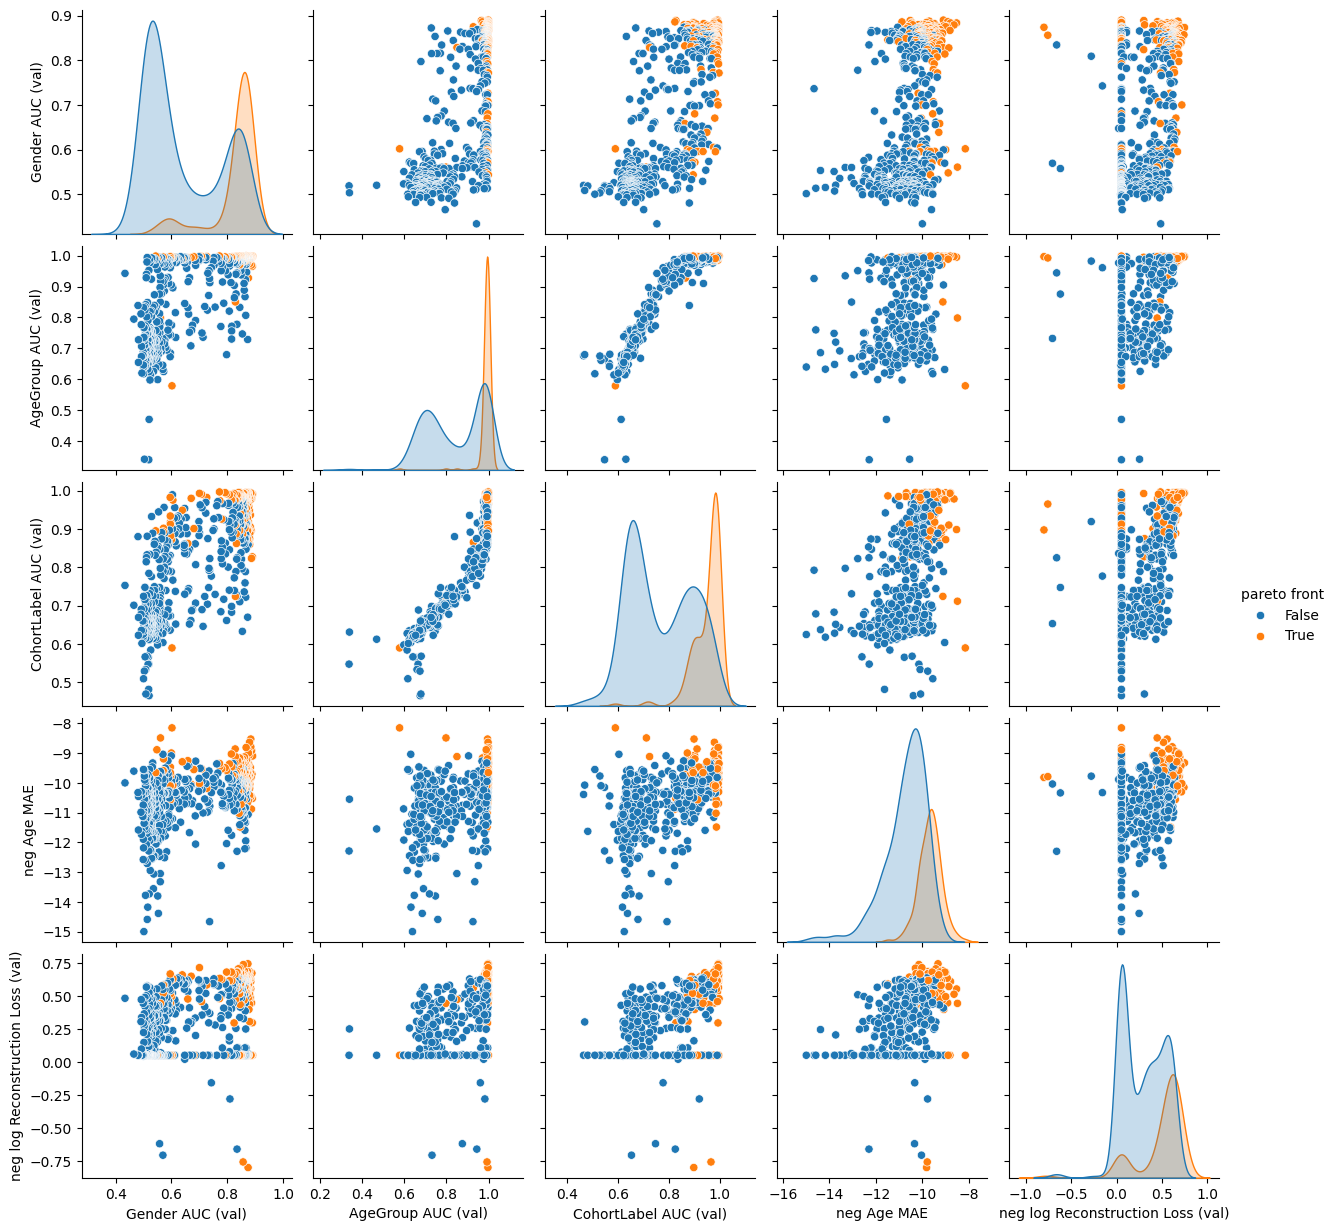

In [61]:
df_obj['pareto front'] = False
df_obj.loc[pareto_df.index, 'pareto front'] = True
sns.pairplot(df_obj, hue='pareto front')

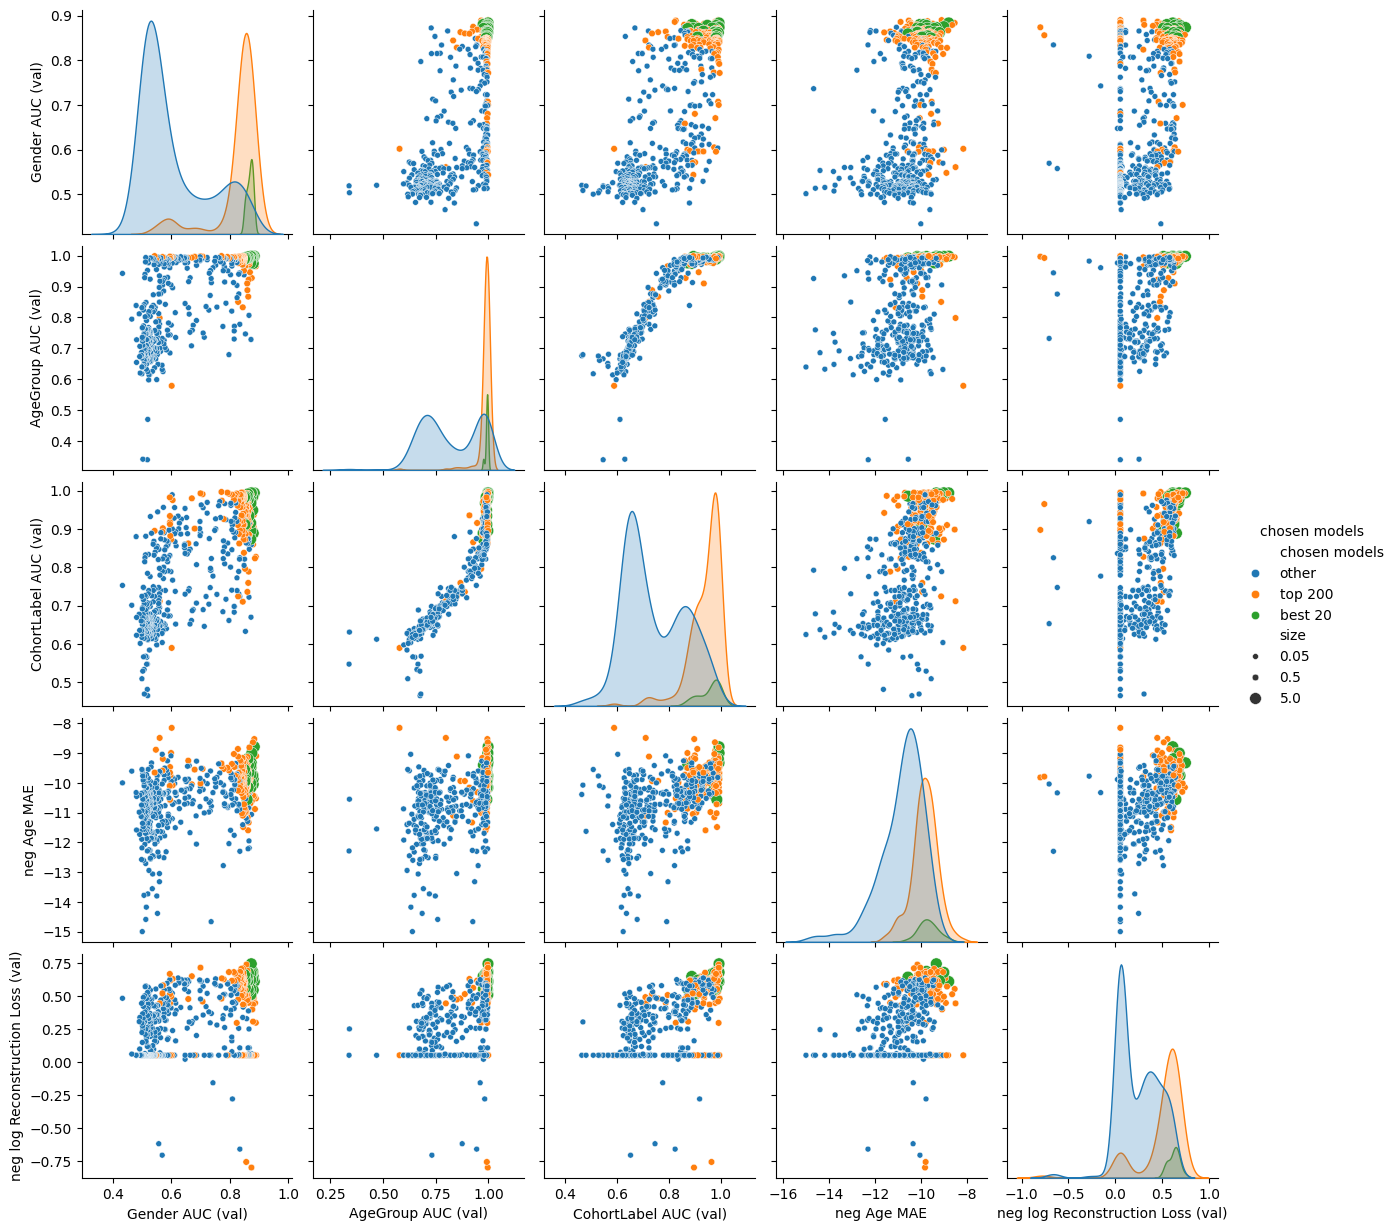

In [171]:
df_obj['chosen models'] = 'other'
df_obj.loc[vae_models['Has Tag april18_top200'], 'chosen models'] = 'top 200'
df_obj.loc[vae_models['Has Tag april18_best20'], 'chosen models'] = 'best 20'
df_obj['size'] = 0.05
df_obj.loc[vae_models['Has Tag april18_top200'], 'size'] = 0.5
df_obj.loc[vae_models['Has Tag april18_best20'], 'size'] = 5
not_size_cols = [col for col in df_obj.columns if col != 'size']
sns.pairplot(df_obj[not_size_cols], hue='chosen models',hue_order=['other','top 200','best 20'],plot_kws={'size':df_obj['size']})

In [166]:
df_obj

Gender AUC (val)  AgeGroup AUC (val)  CohortLabel AUC (val)  \
Id                                                                      
RCC-3013          0.890305            0.998471               0.990883   
RCC-2559          0.889301            0.965923               0.827350   
RCC-2987          0.887873            0.995976               0.989760   
RCC-2507          0.886695            0.995847               0.979680   
RCC-2549          0.886217            0.970000               0.823431   
...                    ...                 ...                    ...   
RCC-2923          0.481922            0.727723               0.669301   
RCC-2539          0.481613            0.654470               0.622611   
RCC-3004          0.480185            0.838830               0.880076   
RCC-2657          0.465275            0.794672               0.700982   
RCC-2253          0.433537            0.942881               0.752743   

          neg Age MAE  neg log Reconstruction Loss (val) chosen models  size  
Id                                                                            
RCC-3013    -9.093743                           0.053260       top 200     2  
RCC-2559   -10.521715                           0.300080       top 200     2  
RCC-2987    -9.704203                           0.676420       top 200     2  
RCC-2507    -8.908306                           0.450439       top 200     2  
RCC-2549   -10.877678                           0.053255       top 200     2  
...               ...                                ...           ...   ...  
RCC-2923   -10.453390                           0.053258         other     1  
RCC-2539   -11.581621                           0.053258         other     1  
RCC-3004   -10.323528                           0.053267         other     1  
RCC-2657    -9.603444                           0.062284         other     1  
RCC-2253    -9.998194                           0.485751         other     1  

[560 rows x 7 columns]

In [90]:
NEPTUNE_API_TOKEN = 'eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxMGM5ZDhiMy1kOTlhLTRlMTAtOGFlYy1hOTQzMDE1YjZlNjcifQ=='


## Tag best models from list

166


## Choose April20 Top 200

In [48]:
chosen_models = vae_models[vae_models['Has Tag april17_best90'] | vae_models['Has Tag april17_pareto']].index.to_list()

other_chosen_models = vae_models[(vae_models['Reconstruction Loss (val)'] < 0.65) & (vae_models['Gender AUC (val)'] >0.825) & (vae_models['Age MAE (val)'] < 12)].index.to_list()

print(len(other_chosen_models))

chosen_models= list(set(chosen_models + other_chosen_models))
print(len(chosen_models))

151
201


In [25]:
NEPTUNE_API_TOKEN = 'eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxMGM5ZDhiMy1kOTlhLTRlMTAtOGFlYy1hOTQzMDE1YjZlNjcifQ=='


In [51]:
for run_id in chosen_models:
    run = neptune.init_run(project='revivemed/RCC', api_token=NEPTUNE_API_TOKEN, with_id=run_id)
    run['sys/tags'].add('april18_top200')
    run.stop()

[neptune] [warning] NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-2492
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 1 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-2492/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-2496
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 1 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-2496/m

## Choose the Top 20 Models

In [57]:
best_df =  vae_models[vae_models['Has Tag april17_pareto']].copy()

best_df = best_df[(best_df['Latent dim'] > 40) & (best_df['# hidden layers'] < 4) & (best_df['# hidden layers'] > 1)].copy()

best_df = best_df[(best_df['Reconstruction Loss (val)'] < 0.6) & (best_df['Gender AUC (val)'] >0.85) & (best_df['Age MAE (val)'] < 11)].copy()

print(best_df.shape)

(21, 34)


In [55]:
top_20_models_df = vae_models[vae_models['Has Tag april17_best90'] & vae_models['Has Tag april17_pareto']].copy()

top_20_models = top_20_models_df[(top_20_models_df['Latent dim'] > 40) & (top_20_models_df['# hidden layers'] < 4) & (top_20_models_df['# hidden layers'] > 1)].index.to_list()

print(len(top_20_models))

21


In [56]:
for run_id in top_20_models:
    run = neptune.init_run(project='revivemed/RCC', api_token=NEPTUNE_API_TOKEN, with_id=run_id)
    run['sys/tags'].add('april18_best20')
    run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-2390
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 1 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-2390/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-2964
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 1 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-2964/m

## Chose Leila Top Models

In [21]:
vae_models

Reconstruction Loss (val)  StudyID AUC (val)  CohortLabel AUC (val)  \
Id                                                                              
RCC-3013                   0.948134           0.541620               0.990883   
RCC-2559                   0.740759           0.777997               0.827350   
RCC-2987                   0.508434           0.504746               0.989760   
RCC-2507                   0.637348           0.881439               0.979680   
RCC-2549                   0.948138           0.766172               0.823431   
...                             ...                ...                    ...   
RCC-2731                   0.565518           0.588918               0.446569   
RCC-2828                   0.576448           0.604487               0.530451   
RCC-2657                   0.939616           0.702336               0.700982   
RCC-2800                   0.953183           0.686835               0.525452   
RCC-2253                   0.615235           0.801001               0.752743   

          Gender AUC (val)  AgeGroup AUC (val)  Age MAE (val)  \
Id                                                              
RCC-3013          0.890305            0.998471       9.093743   
RCC-2559          0.889301            0.965923      10.521715   
RCC-2987          0.887873            0.995976       9.704203   
RCC-2507          0.886695            0.995847       8.908306   
RCC-2549          0.886217            0.970000      10.877678   
...                    ...                 ...            ...   
RCC-2731          0.471697            0.502566      39.654396   
RCC-2828          0.468668            0.382603      38.956985   
RCC-2657          0.465275            0.794672       9.603444   
RCC-2800          0.463991            0.497216      38.959576   
RCC-2253          0.433537            0.942881       9.998194   

                 study name  Both OS C-Index (finetune, val)  \
Id                                                             
RCC-3013    Multi Obj Apr15                         0.687362   
RCC-2559    Multi Obj Apr12                              NaN   
RCC-2987    Multi Obj Apr15                         0.674226   
RCC-2507    Multi Obj Apr12                              NaN   
RCC-2549    Multi Obj Apr12                              NaN   
...                     ...                              ...   
RCC-2731    Multi Obj Apr12                              NaN   
RCC-2828    Multi Obj Apr12                         0.500000   
RCC-2657    Multi Obj Apr12                              NaN   
RCC-2800    Multi Obj Apr12                         0.612696   
RCC-2253  Multi Obj Apr11v2                              NaN   

          Both OS C-Index (randinit, val)  Both PFS C-Index (finetune, val)  \
Id                                                                            
RCC-3013                         0.520318                          0.545353   
RCC-2559                              NaN                          0.560457   
RCC-2987                         0.500000                          0.553891   
RCC-2507                              NaN                          0.531973   
RCC-2549                              NaN                          0.539786   
...                                   ...                               ...   
RCC-2731                              NaN                          0.500000   
RCC-2828                         0.634237                          0.500000   
RCC-2657                              NaN                          0.556925   
RCC-2800                         0.625016                          0.500000   
RCC-2253                              NaN                          0.580651   

          ...  model complexity  MSKCC AUC Diff (finetune-randinit)  \
Id        ...                                                         
RCC-3013  ...             400.0                            0.367460   
RCC-2559  ...             168.0     

In [22]:
best_df =  vae_models.copy()

# best_df = best_df[(best_df['Latent dim'] > 40) & (best_df['# hidden layers'] < 4) & (best_df['# hidden layers'] > 1)].copy()

best_df = best_df[(best_df['Reconstruction Loss (val)'] < 0.65) & (best_df['Gender AUC (val)'] >0.825) & (best_df['Age MAE (val)'] < 12)
                  & (best_df['AgeGroup AUC (val)'] > 0.9) & (best_df['CohortLabel AUC (val)'] > 0.9)].copy()

print(best_df.shape)

(123, 36)


In [23]:
best_df.index

Index(['RCC-2987', 'RCC-2507', 'RCC-2390', 'RCC-2370', 'RCC-2876', 'RCC-2848',
       'RCC-2425', 'RCC-2502', 'RCC-2956', 'RCC-2488',
       ...
       'RCC-2646', 'RCC-2187', 'RCC-2169', 'RCC-2273', 'RCC-2228', 'RCC-2338',
       'RCC-2246', 'RCC-2185', 'RCC-2344', 'RCC-3008'],
      dtype='object', name='Id', length=123)

In [26]:
for run_id in best_df.index:
    run = neptune.init_run(project='revivemed/RCC', api_token=NEPTUNE_API_TOKEN, with_id=run_id)
    run['sys/tags'].add('april18_leila')
    run.stop()

[neptune] [warning] NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-2987
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 1 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-2987/metadata
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-2507
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 1 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-2507/m